In [3]:
#import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

# sns.set_style('darkgrid')
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (10, 6)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
raw_df  = pd.read_csv("weatherAUS.csv")
raw_df 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
raw_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
#Dropping the rows where "RainTomorrow"
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split

2. Identify input and target columns

3. Identify numeric and categorical columns

4. Impute (fill) missing numeric values

5. Scale numeric values to the (0,1) range

6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

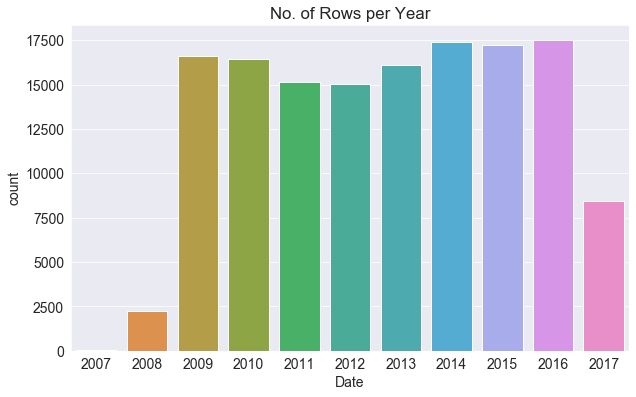

In [7]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.

In [8]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]

val_df = raw_df[year == 2015]

test_df = raw_df[year > 2015]

In [9]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


### Input and Target Columns

In [10]:
input_cols = list(train_df.columns)[1:-1]  ### ------ X 
target_col = 'RainTomorrow' #### ----- y

In [11]:
train_inputs = train_df[input_cols].copy() #### -- X_train
train_targets = train_df[target_col].copy() ##### --- Y_train

In [12]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [16]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [20]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [21]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [22]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Imputing missing numeric values

In [25]:
train_inputs.isnull().sum()

Location             0
MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustDir       6943
WindGustSpeed     6902
WindDir9am        7323
WindDir3pm        2030
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
RainToday         1000
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
#where machoine see and understands the task
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [28]:
#executes the imputer
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [33]:
train_inputs[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [30]:
imputer = SimpleImputer(strategy = 'most_frequent').fit(raw_df[categorical_cols])

In [31]:
train_inputs[categorical_cols] = imputer.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = imputer.transform(val_inputs[categorical_cols])
test_inputs[categorical_cols] = imputer.transform(test_inputs[categorical_cols])

In [34]:
train_inputs[categorical_cols].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Scaling Numeric Features

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [37]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [38]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


### Encoding Categorical Data

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [41]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [45]:
# train test and val were all derived from mother data df.
# Its important that we reset the index to zero for all of them as we will combine data later.
train_inputs.reset_index(drop=True,inplace=True)
val_inputs.reset_index(drop=True,inplace=True)
test_inputs.reset_index(drop=True,inplace=True)

In [46]:
#Code which converts the encoded value to dummy and puts it in the dataframe
#pd.DataFrame(encoder.transform(train_inputs[categorical_cols]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [47]:
train_inputs[encoded_cols] = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]))
val_inputs[encoded_cols] = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]))
test_inputs[encoded_cols] = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]))

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [48]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [51]:
X_train.isnull().sum()

MinTemp                      0
MaxTemp                      0
Rainfall                     0
Evaporation                  0
Sunshine                     0
WindGustSpeed                0
WindSpeed9am                 0
WindSpeed3pm                 0
Humidity9am                  0
Humidity3pm                  0
Pressure9am                  0
Pressure3pm                  0
Cloud9am                     0
Cloud3pm                     0
Temp9am                      0
Temp3pm                      0
Location_Adelaide            0
Location_Albany              0
Location_Albury              0
Location_AliceSprings        0
Location_BadgerysCreek       0
Location_Ballarat            0
Location_Bendigo             0
Location_Brisbane            0
Location_Cairns              0
Location_Canberra            0
Location_Cobar               0
Location_CoffsHarbour        0
Location_Dartmoor            0
Location_Darwin              0
Location_GoldCoast           0
Location_Hobart              0
Location

## Training and Visualizing Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [54]:
%%time
model.fit(X_train, train_targets)

Wall time: 2.71 s


DecisionTreeClassifier()

## Evaluation

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
train_preds = model.predict(X_train)

In [57]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [59]:
train_probs = model.predict_proba(X_train)

In [2]:
train_probs

NameError: name 'train_probs' is not defined

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [61]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using model.score

In [62]:
model.score(X_val, val_targets)

0.7920027856769776

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

## Visualization

In [64]:
from sklearn.tree import plot_tree, export_text

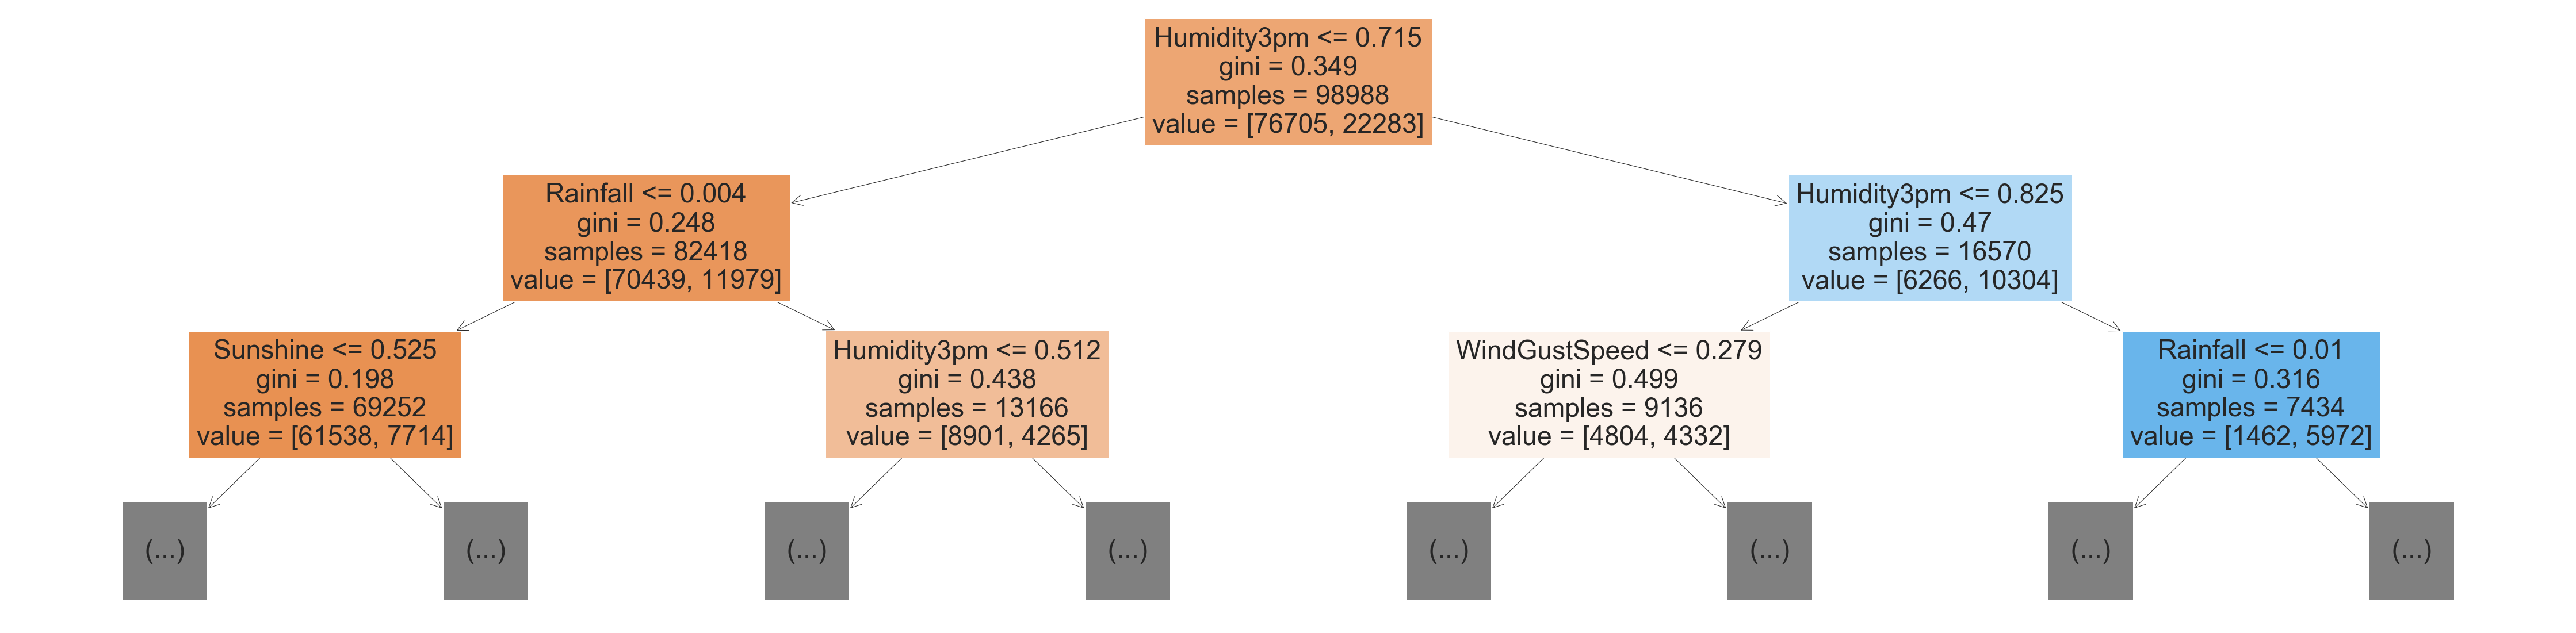

In [65]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [66]:
model.tree_.max_depth

52

In [69]:
tree_text = export_text(model, max_depth=4, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- truncated branch of depth 34
|   |   |   |   |--- WindGustSpeed >  0.36
|   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |--- Pressure3pm >  0.58
|   |   |   |   |--- Pressure3pm <= 0.70
|   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |--- Pressure3pm >  0.70
|   |   |   |   |   |--- truncated branch of depth 24
|   |   |--- Sunshine >  0.52
|   |   |   |--- Humidity3pm <= 0.51
|   |   |   |   |--- WindGustSpeed <= 0.40
|   |   |   |   |   |--- truncated branch of depth 38
|   |   |   |   |--- WindGustSpeed >  0.40
|   |   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- Humidity3pm >  0.51
|   |   |   |   |--- WindGustSpeed <= 0.35
|   |   |   |   |   |--- truncated branch of depth 48
|   |   |   |   |--- WindGustSpeed >  0.35
|   |   |   |   |   |--

## Feature Importance

In [70]:
model.feature_importances_

array([3.64398423e-02, 3.20320919e-02, 5.96228376e-02, 2.39386424e-02,
       4.94355686e-02, 5.62391364e-02, 2.69915487e-02, 2.95961494e-02,
       3.99772143e-02, 2.62083465e-01, 3.49629343e-02, 6.28491438e-02,
       1.33990073e-02, 1.74920878e-02, 3.20900375e-02, 3.01557830e-02,
       2.45904025e-03, 2.16200196e-03, 1.51784433e-03, 8.06481950e-04,
       1.40585603e-03, 1.35074708e-03, 7.03423156e-04, 1.76822535e-03,
       1.20989715e-03, 1.61031953e-03, 1.01507540e-03, 1.92482950e-03,
       1.53319699e-03, 1.93313866e-04, 1.19002228e-03, 1.15581210e-03,
       4.47294511e-04, 1.09670090e-03, 1.71948114e-03, 7.88392492e-04,
       8.94816747e-04, 8.05739728e-04, 2.01174121e-03, 1.96260531e-03,
       3.13382516e-04, 5.95478385e-04, 1.24159583e-03, 1.42063540e-03,
       1.41157169e-03, 1.10726849e-03, 8.80123534e-04, 1.45737310e-03,
       1.19645362e-03, 2.14144673e-03, 1.04250708e-03, 1.91614440e-03,
       1.03132435e-03, 1.40445641e-03, 1.49375893e-03, 4.94103415e-04,
      

In [71]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [72]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.262083
11,Pressure3pm,0.062849
2,Rainfall,0.059623
5,WindGustSpeed,0.056239
4,Sunshine,0.049436
8,Humidity9am,0.039977
0,MinTemp,0.036440
10,Pressure9am,0.034963
14,Temp9am,0.032090
1,MaxTemp,0.032032


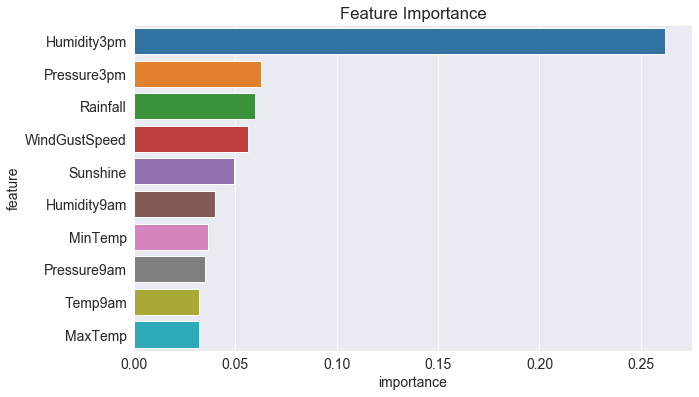

In [73]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as regularlization.

max_depth

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [74]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, train_targets)
model.score(X_train, train_targets)

0.8291308037337859

In [75]:
model.score(X_val, val_targets)

0.8334397307178921

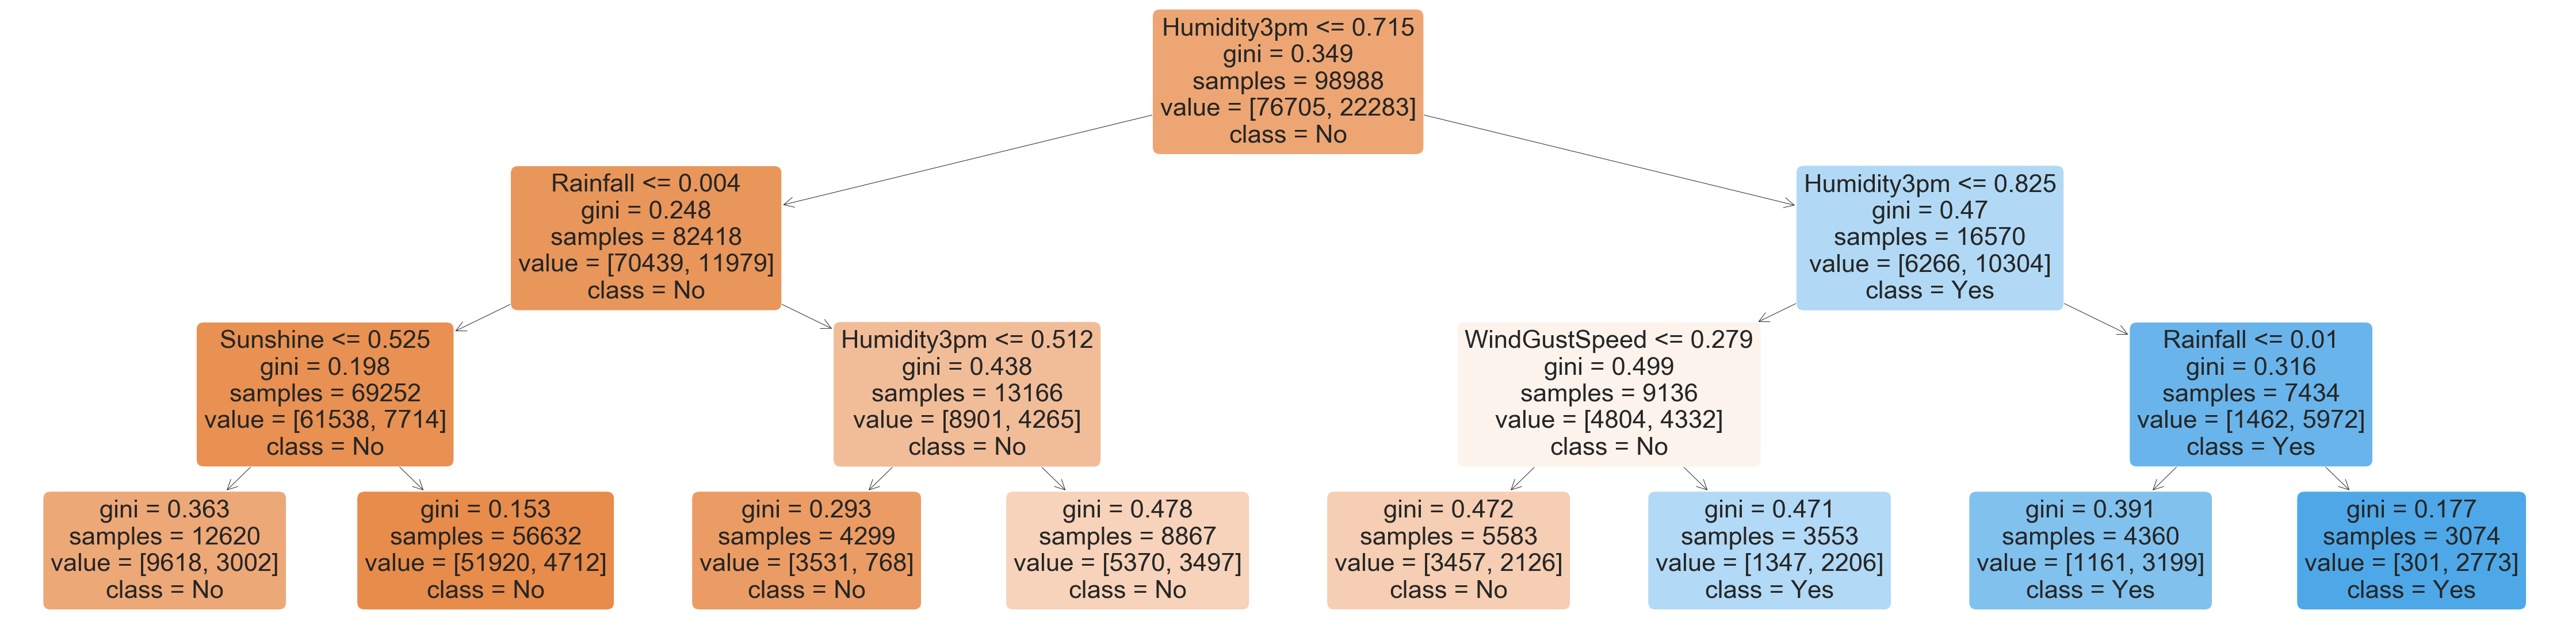

In [76]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_)
plt.show()

#### Let's experiment with different depths using a helper function

In [77]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [78]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])
errors_df

Wall time: 33 s


,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147715,0.157507
8,9,0.140896,0.156752
9,10,0.132844,0.157565


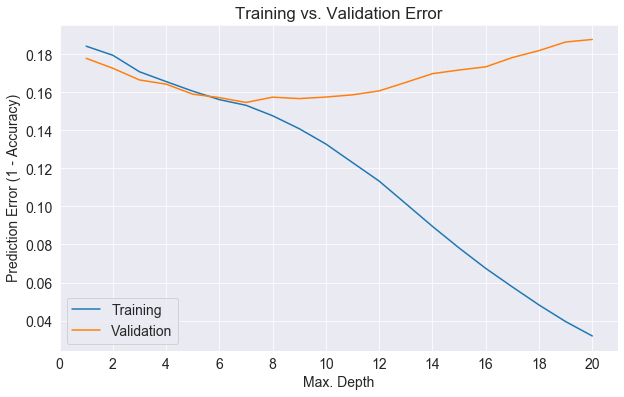

In [79]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [80]:
model = DecisionTreeClassifier(max_depth=7).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8452788578724392

max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depth

In [81]:
model = DecisionTreeClassifier(max_leaf_nodes=128)

In [82]:
model.fit(X_train, train_targets)
model.score(X_train, train_targets)

0.8481836182163495

In [83]:
model.score(X_val, val_targets)

0.8444083338169578

In [84]:
test_preds = model.predict(X_test)

In [85]:
val_preds = model.predict(X_val)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(test_targets, test_preds))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90     20028
         Yes       0.69      0.48      0.57      5946

    accuracy                           0.83     25974
   macro avg       0.78      0.71      0.73     25974
weighted avg       0.82      0.83      0.82     25974



In [87]:
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     13583
         Yes       0.70      0.46      0.55      3648

    accuracy                           0.84     17231
   macro avg       0.79      0.70      0.73     17231
weighted avg       0.83      0.84      0.83     17231

